<a href="https://colab.research.google.com/github/KimSeonHo-719/CV/blob/main/20251_ComputerVision_Assignment_2_template.ipynb" target="_parent"><img src="https://colab.research.google.com/assets/colab-badge.svg" alt="Open In Colab"/></a>

In [84]:
# Q1.
import numpy as np
import cv2
import matplotlib.pyplot as plt

def load_image_gray(path):
    """이미지를 그레이스케일로 불러오기"""
    img = cv2.imread(path)
    return cv2.cvtColor(img, cv2.COLOR_BGR2GRAY).astype(np.float32)

def compute_gradients(img):
    # 구현 필요

    # Sobel 필터 3x3
    Kx = np.array([[1,0,-1],[2,0,-2],[1,0,-1]], np.float32) # 수평 방향
    Ky = Kx.T # 수직 방향

    # 커널 2D 컨볼루션
    # 수평, 수직 그래디언트 컨볼루션
    Ix = cv2.filter2D(img, cv2.CV_32F, Kx) # 커널 인자 중간에 float형 넣어줘야 함
    Iy = cv2.filter2D(img, cv2.CV_32F, Ky)
    return Ix, Iy # x,y 방향 gradient

def harris_response(Ix, Iy, k, window_size):
    """Harris 코너 응답 계산"""
  # 구현 필요, 보통 k는 0.04, window size는 3 정도의 값을 사용
  # window 사이즈 k>=5 이상일 경우 파스칼 삼각형을 이용한다.

    Ixx, Iyy, Ixy = Ix*Ix, Iy*Iy, Ix*Iy

    # 박스 필터 윈도우
    win = np.ones((window_size,window_size), np.float32)/(window_size**2) # 정규화 빼먹으면 안됨

    # 텐서 M 미리 계산하는게 편함
    Sxx = cv2.filter2D(Ixx, -1, win)
    Syy = cv2.filter2D(Iyy, -1, win)
    Sxy = cv2.filter2D(Ixy, -1, win)

    # 텐서 M determination
    det = Sxx*Syy - Sxy*Sxy
    trace = Sxx + Syy
    # R = det(M) - k*trace(M)^2
    R = det - k * (trace**2)
    return R # harris responce

def non_max_suppression(R, threshold_ratio):
  # 구현 필요
  # Dense한 R 값을 입력으로 받아 자신 주변에 비해 값이 큰 위치들만을 특징점으로 반환
  # 단순 R값을 Threshold할 수 도 있고, threshold ratio를 사용하여 R 내의 최고값의 일정 이상만 코너점으로 사용할 수 있음
  # 여러 threshold 방법을 살펴볼 것
    # harris responce R 높이, 너비
    H, W = R.shape

    # threshold 값은 ratio 이용하여 R 최고값을 코너점 사용
    thresh = threshold_ratio * R.max()

    # 임계치 이상 코너점 후보
    candidates = (R > thresh)

    # 패딩
    # NMS 윈도우 반경 = 1
    radius = 1
    pad = radius
    Rp = np.pad(R, pad, mode='constant', constant_values=-np.inf)
    corners = []
    for y in range(pad, H+pad):
        for x in range(pad, W+pad):
            # 좌표 (y,x)가 후보군에 속하는지 아니라면 예외처리 -> 루프문 탈출하도록 설계
            if not candidates[y-pad, x-pad]:
                continue
            # 윈도우 [2*radius+1,2*radius+1]에서 Rp[y,x]가 최대인지 -> 맞으면 corners 리스트에 추가
            if Rp[y, x] == Rp[y-radius:y+radius+1, x-radius:x+radius+1].max():
                corners.append((y-pad, x-pad))
    return corners # corner points


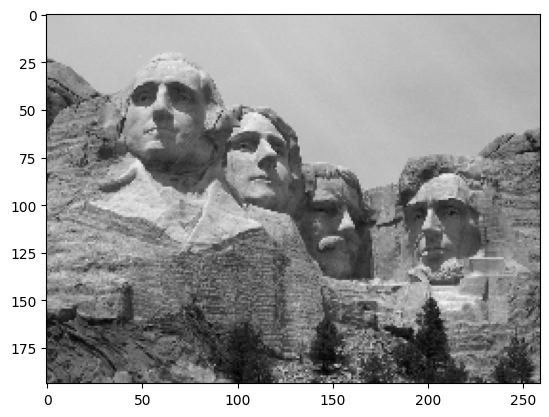

/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 48320 (\N{HANGUL SYLLABLE BYEON}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)
/usr/local/lib/python3.11/dist-packages/IPython/core/pylabtools.py:151: UserWarning: Glyph 54868 (\N{HANGUL SYLLABLE HWA}) missing from font(s) DejaVu Sans.
  fig.canvas.print_figure(bytes_io, **kw)


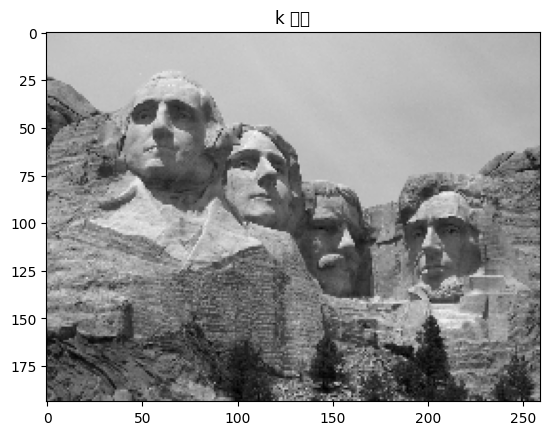

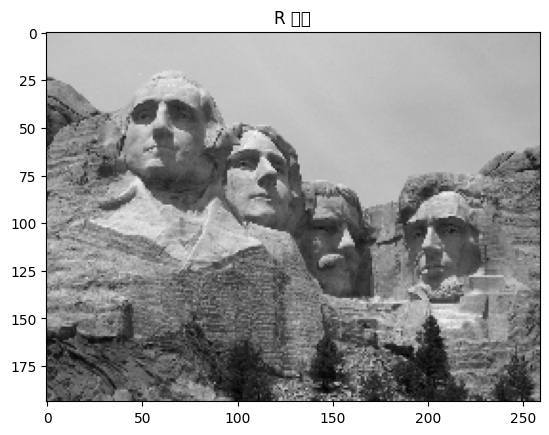

In [85]:
# 예시: img1 → img2 매칭

img1 = load_image_gray("/content/img1.jpg")  # 이미지 경로 수정 필요
img1 = cv2.resize(img1, (0, 0), fx=0.1, fy=0.1) # 이미지 크기가 너무 클 경우 resize 하면 빠르게 동작 가능, 적당히 선택할 것
Ix, Iy = compute_gradients(img1)
R = harris_response(Ix, Iy, 0.04, 3) # k=0.04
# 임계값 0.1
keypoints1 = np.argwhere(R > 0.1) #non-maximum suppression을 사용하지 않을 때 단순 thresholding으로 keypoint를 고르는 부분
# non-maximum suppression을 사용 시 추가 코드 필요

# 이미지 시각화
plt.imshow(img1, cmap='gray')
plt.show()

img1_k = load_image_gray("/content/img1.jpg")  # 이미지 경로 수정 필요
img1_k = cv2.resize(img1_k, (0, 0), fx=0.1, fy=0.1) # 이미지 크기가 너무 클 경우 resize 하면 빠르게 동작 가능, 적당히 선택할 것
Ix, Iy = compute_gradients(img1_k)
R = harris_response(Ix, Iy, 0.08, 3) # k=0.08
# 임계값 0.1
keypoints1_k = np.argwhere(R > 0.1) #non-maximum suppression을 사용하지 않을 때 단순 thresholding으로 keypoint를 고르는 부분
# non-maximum suppression을 사용 시 추가 코드 필요

# 이미지 시각화
plt.imshow(img1_k, cmap='gray')
plt.title('k 변화')
plt.show()

img1_R = load_image_gray("/content/img1.jpg")  # 이미지 경로 수정 필요
img1_R = cv2.resize(img1_R, (0, 0), fx=0.1, fy=0.1) # 이미지 크기가 너무 클 경우 resize 하면 빠르게 동작 가능, 적당히 선택할 것
Ix, Iy = compute_gradients(img1_R)
R = harris_response(Ix, Iy, 0.04, 3) # k=0.04
# 임계값 변화
keypoints1_R = np.argwhere(R > 0.4) #non-maximum suppression을 사용하지 않을 때 단순 thresholding으로 keypoint를 고르는 부분
# non-maximum suppression을 사용 시 추가 코드 필요

# 이미지 시각화
plt.imshow(img1_R, cmap='gray')
plt.title('R 변화')
plt.show()


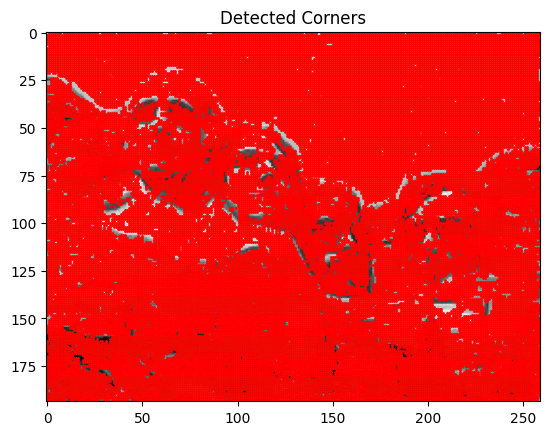

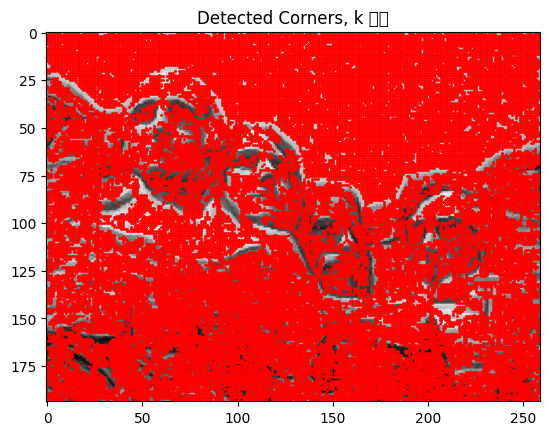

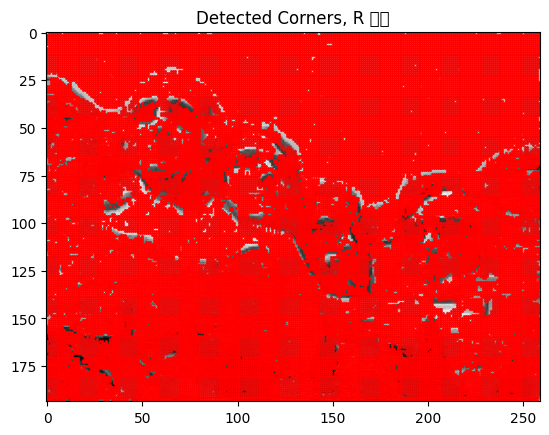

In [86]:
# 이미지 + feature 시각화
plt.imshow(img1, cmap='gray')
plt.scatter(keypoints1[:, 1], keypoints1[:, 0], c='r', s=1)
plt.title("Detected Corners")
plt.show()

# k = 0.08 일 때, R 계산식에서 두번째 항이 너무 커져버린다. -> 민감도 붕괴
# 따라서 꽤 많은 R 값이 음수가 되고 그로 인해 임계값이 음수가 되어 코너가 아닌 너무 많은 점들이 코너로 검출되기 때문이다.
# 실제로 Harris, Stephens 논문에서도 k 값을 0.04~0.06으로 권장한다고 한다. -> 위키피디아 해리스 코너 검출 참고
plt.imshow(img1_k, cmap='gray')
plt.scatter(keypoints1_k[:, 1], keypoints1_k[:, 0], c='r', s=1)
plt.title("Detected Corners, k 변화")
plt.show()

# 당연하게도 R 값을 0.4로 증가시켰다는 뜻은 코너 검출을 더 깐깐하게 한다는 것이므로
# 첫번째 사진과 비교해봤을 때 화면이 더 깔끔한 것을 확인할 수 있다.
plt.imshow(img1_R, cmap='gray')
plt.scatter(keypoints1_R[:, 1], keypoints1_R[:, 0], c='r', s=1)
plt.title("Detected Corners, R 변화")
plt.show()

In [87]:
# Q2.
import numpy as np
import cv2

def compute_magnitude_orientation(Ix, Iy):
    """Gradient magnitude & orientation"""
    # 크기 Magnitude, 한점에서 전체 변화량
    # mag = root(Ix^2 + Ix^2)
    mag = np.hypot(Ix, Iy)
    # 방향 Orientation, 변화가 가장 큰 방향을 구함.
    # arctan 계산 결과는 radian 이므로 degree로 바꾸고 음수 범위를 0-360으로 바꿈.
    ori = (np.degrees(np.arctan2(Iy, Ix)) + 360) % 360
    return mag, ori
  #구현 필요, magnitude의 x 방향 성분과 y 방향 성분을 보고 방향을 계산

def compute_dominant_orientation(Ix, Iy, y, x, radius=8, num_bins=36):
    """keypoint 주변에서 dominant orientation 계산"""
  #구현 필요, x,y 위치 근처의 패치들의 orientation을 투표해서 dominant orientation 계산, 반환
  # patch size는 radius, 투표할 각(angle)의 단위는 360/num_bins가 될 것임

    mag, ori = compute_magnitude_orientation(Ix, Iy)
    # 이미지 높이, 너비
    h, w = mag.shape

    # y1&y2, x1&x2 radius 내의 패치 범위 클램핑
    y1, y2 = max(0, y-radius), min(h, y+radius+1)
    x1, x2 = max(0, x-radius), min(w, x+radius+1)
    # 히스토그램 채울 픽셀 패치 영역

    # xs, ys는 중심으로부터 상대적 거리 벡터
    xs = np.arange(x1, x2) - x
    ys = np.arange(y1, y2) - y

    # 2D 그리드
    gx, gy = np.meshgrid(xs, ys)

    # 가우시안 가중치
    sigma = radius/2
    gauss = np.exp(-(gx**2 + gy**2) / (2*sigma**2))

    # 히스토그램 구하기
    hist = np.zeros(num_bins, np.float32)
    bin_w = 360/num_bins

    # 히스토그램 축적 루프
    for i, yy in enumerate(range(y1, y2)):
        for j, xx in enumerate(range(x1, x2)):
            weight = mag[yy, xx] * gauss[i, j]
            b = int(ori[yy, xx]//bin_w) % num_bins
            hist[b] += weight

    # 스무딩 적용
    hist = np.convolve(np.r_[hist[-1], hist, hist[0]], [1/3,1/3,1/3], mode='same')[1:-1]
    # 히스토그램 최대값 80% 이상인 피크 추출
    peaks = np.where(hist >= 0.8 * hist.max())[0]
    return [(p+0.5)*bin_w for p in peaks] # dominant한 orientation 리스트 추출


def sift_descriptor(img, keypoints, patch_size=16, cell_size=4, num_bins=8):
  # SIFT descriptor 구현 필요
  # 이미지 내의 keypoint들마다, dominant한 orientation을 구하고, SIFT feature 계산
  # 팁: 실제로 keypoint마다 dominant orientation 방향으로 이미지를 회전 시키면 계산이 너무 많아지므로, 패치 내의 orientation을 dominant orientation 만큼 조정해주면 편리할 것임

  # intensity, 엣지 영향 억제, 거리 상관 x 벡터 생성 과정
    Ix, Iy = compute_gradients(img)
    mag = np.hypot(Ix, Iy)
    ori = (np.degrees(np.arctan2(Iy, Ix)) + 360) % 360

    half = patch_size // 2
    step = patch_size / cell_size
    bin_w = 360.0 / num_bins
    # y0, x0 = keypoints # 오류 발생 -> dominant_ori에 keypoints 담으려는데 당연히 안됨 => (y,x) 인자 2개니깐
    # dominant_orientation 따로 구하고
    all_desc = []
    # 각각의 키포인트에 대해 구해야 함.
    for (y0, x0) in keypoints:
        # 이 키포인트에서 dominant_orientation 계산
        dom_ori = compute_dominant_orientation(Ix, Iy, y0, x0)
        # 각 방향마다 descriptor 만ㄷ를어서
        for dominant_ori in dom_ori:
            theta = np.deg2rad(dominant_ori)
            cos_t, sin_t = np.cos(theta), np.sin(theta)
            # 4x4 빈 히스토그램 생성
            desc = np.zeros((cell_size, cell_size, num_bins), dtype=np.float32)
            h, w = img.shape

    # 회전 정렬
    # 패치 중심에서 오프셋 계산
    half = patch_size//2
    # dominant orientation 계산을 위해 radian으로 계산.
    # theta = np.deg2rad(dominant_ori)
    # 회전 변환 cos, sin 값
    # cos_t, sin_t = np.cos(theta), np.sin(theta)

    # 서브셀 크기 = 4픽셀 4x4
    step = patch_size/cell_size
    bin_w = 360/num_bins



    # 팁의 내용대로 패치 내의 orientation을 dominant만큼 조정
    for i in range(patch_size):
        for j in range(patch_size):
            # 각 패치 픽셀 (j,i)를 키포인트 기준 (dx,dy)로 중심화
            dx, dy = j-half+0.5, i-half+0.5
            # dominant orientation만큼 역회전시켜 실제 이미지 좌표 (xr,yr) 계산 -> 이때 dx, dy 헷갈리지 않게
            xr = cos_t*dx + sin_t*dy
            yr = -sin_t*dx + cos_t*dy
            # 실제 이미지 상의 좌표로 변환 완료
            xi, yi = int(round(x0+xr)), int(round(y0+yr))
            # 만약 좌표가 범위 밖이면 건너 뛴다. (예외 처리 필수)
            if xi<0 or xi>=w or yi<0 or yi>=h: continue # 이거 처리 안돼서 처음에 매칭 이상했나
            # 서브셀에서 어느 위치인지
            ci, cj = int(j//step), int(i//step)
            ang = (ori[yi, xi] - dominant_ori) % 360
            b = int(ang//bin_w) % num_bins
            # orientation 기준 회전 좌표 -> 히스토그램에 축적
            desc[cj, ci, b] += mag[yi, xi]

    # 3D 히스토그램을 1D 벡터로 펼치고
    vec = desc.flatten()
    # 첫번째 L2 정규화-> 0~1 범위로 조정
    vec /= (np.linalg.norm(vec)+1e-7)
    # 값을 0.2이상 클리핑 하여 엣지 영향, 노이즈 억제
    vec = np.clip(vec, 0, 0.2)
    # 클리핑 이후 벡터 길이 유지 (클리핑 하면 벡터 길이가 짧아지기 때문이다.)
    vec /= (np.linalg.norm(vec)+1e-7) # 이거 없으면 유클라디안 거리가 왜곡되고 Ratio Test 임계값 적용도 안됨.

    all_desc.append(vec)

    return np.vstack(all_desc) # descriptors 반환


In [88]:
# Q3.
import numpy as np

def match_descriptors_nn(desc1, desc2):
    """
    Nearest Neighbor matching (brute-force L2 distance)
    desc1: (N1, D), desc2: (N2, D)
    return: list of (idx1, idx2)
    """

    # 매칭 결과 저장 리스트
    matches = []
    # 브루트포스로 진행 -> C언어 때 했던 것처럼 그냥 하면 될듯??
    # descriptor1 리스트의 각 descriptor d1 돌면서 진행
    for i, d1 in enumerate(desc1):
        # descriptor2 의 모든 descriptor를 d1에서 빼고
        # 각 행의 norm 계산 -> 1차원 배열 dists로 만듦
        dists = np.linalg.norm(desc2 - d1, axis=1)
        # j == 가장 가까운거 = dists 배열에서 최솟값 인덱스
        j = np.argmin(dists)
        # desc1[i] 가장 가까운건 desc2[j]로 설정
        matches.append((i, j))
    return matches


def match_descriptors_ratio_test(desc1, desc2, ratio_threshold):
  # NNDR(Nearest Neighbor Distance Ratio) 구현 필요
    matches = []

    # 같은 방식으로 진행
    for i, d1 in enumerate(desc1):
        # 같은 방식으로 dists 구하고
        dists = np.linalg.norm(desc2 - d1, axis=1)
        #
        if dists.size < 2:
            continue  # 두번째 거리까지 필요하므로 desc2 개수가 2개 미만이면 패스
        # 거리 오름차순 인덱스
        idx_sorted = np.argsort(dists) # 오름차순이니깐 0부터 최소
        # best = 최소 거리 인덱스, second = 두번째 최소 거리 인덱스
        best, second_best = idx_sorted[0], idx_sorted[1]
        # 비율 테스트 = 가장 짧은 거리 < threshold * 두 번째 거리 -> d1 < ratio_threshold * d2
        if dists[best] < ratio_threshold * dists[second_best]:
            matches.append((i, best))
    return matches

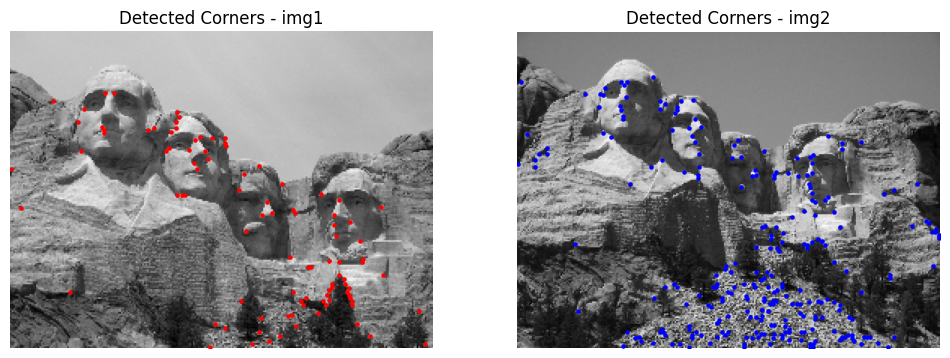

In [89]:
# 예시: img1 → img2 매칭

img1 = load_image_gray("/content/img1.jpg")  # 이미지 경로 수정
img1 = cv2.resize(img1, (0, 0), fx=0.1, fy=0.1) # 이미지 크기가 너무 클 경우 resize 하면 빠르게 동작 가능, 적당히 선택할 것
Ix, Iy = compute_gradients(img1)
R = harris_response(Ix, Iy, 0.04, 3)
keypoints1 = non_max_suppression(R, 0.1)
kp1 = np.array(keypoints1) # 리스트를 배열로 변경하면 scatter 오류 해결

img2 = load_image_gray("/content/img2.jpg")  # 이미지 경로 수정
img2 = cv2.resize(img2, (0, 0), fx=0.1, fy=0.1) # 이미지 크기가 너무 클 경우 resize 하면 빠르게 동작 가능, 적당히 선택할 것
Ix, Iy = compute_gradients(img2)
R = harris_response(Ix, Iy, 0.04, 3)
keypoints2 = non_max_suppression(R, 0.1)
kp2 = np.array(keypoints2) # 리스트를 배열로 변경하면 scatter 오류 해결

# keypoint 시각화 - img1
plt.figure(figsize=(12, 6))
plt.subplot(1, 2, 1)
plt.imshow(img1, cmap='gray')
plt.scatter(kp1[:, 1], kp1[:, 0], c='r', s=5) # 오류 발생 -> 리스트를 Nx2 배열로 바꿔서 슬라이싱
plt.title("Detected Corners - img1")
plt.axis('off')

# keypoint 시각화 - img2
plt.subplot(1, 2, 2)
plt.imshow(img2, cmap='gray')
plt.scatter(kp2[:, 1], kp2[:, 0], c='b', s=5)
plt.title("Detected Corners - img2")
plt.axis('off')

plt.show()
# 밑의 사진을 보면 두 이미지 간 매칭이 사람 얼굴간에는 되는 것 같지만
# 얼굴 밑의 산, 언덕(?) 이 부분이 조금 안되는 것 같다.
# 매칭 제대로 안 될 것 같은 느낌

In [90]:
desc1 = sift_descriptor(img1, keypoints1)
desc2 = sift_descriptor(img2, keypoints2)

In [91]:
# 이미지 매칭 부분
# 꼭 아래의 매칭만을 쓸 필요 없이, 여러 매칭을 조합하거나, 새로운 매칭을 제안해도 무방함
nn_matches = match_descriptors_nn(desc1, desc2)
ratio_matches = match_descriptors_ratio_test(desc1, desc2, ratio_threshold=0.03)

print(f"NN Matching: 총 {len(nn_matches)}개 매치")
print(f"Ratio Test Matching: 총 {len(ratio_matches)}개 매치")
# 초비상!! NN Matching 결과 1개 매칭 -> 뒤의 작업들도 다 안됨

NN Matching: 총 1개 매치
Ratio Test Matching: 총 0개 매치


In [92]:
import matplotlib.pyplot as plt

def draw_matches(img1, img2, keypoints1, keypoints2, matches, max_display=50):
    """
    두 이미지 사이의 매칭 시각화
    """
    # 두 이미지 나란히 붙이기
    h1, w1 = img1.shape
    h2, w2 = img2.shape
    canvas = np.zeros((max(h1, h2), w1 + w2), dtype=np.uint8)
    canvas[:h1, :w1] = img1
    canvas[:h2, w1:] = img2

    # 매칭 점들 표시
    plt.figure(figsize=(12, 6))
    plt.imshow(canvas, cmap='gray')
    plt.axis('off')

    shown = 0
    for idx1, idx2 in matches:
        if shown >= max_display:
            break
        y1, x1 = keypoints1[idx1]
        y2, x2 = keypoints2[idx2]
        plt.plot([x1, x2 + w1], [y1, y2], 'r', linewidth=0.8)
        plt.scatter([x1, x2 + w1], [y1, y2], c='yellow', s=10)
        shown += 1

    plt.title(f"Matching Keypoints (showing up to {max_display})")
    plt.show()


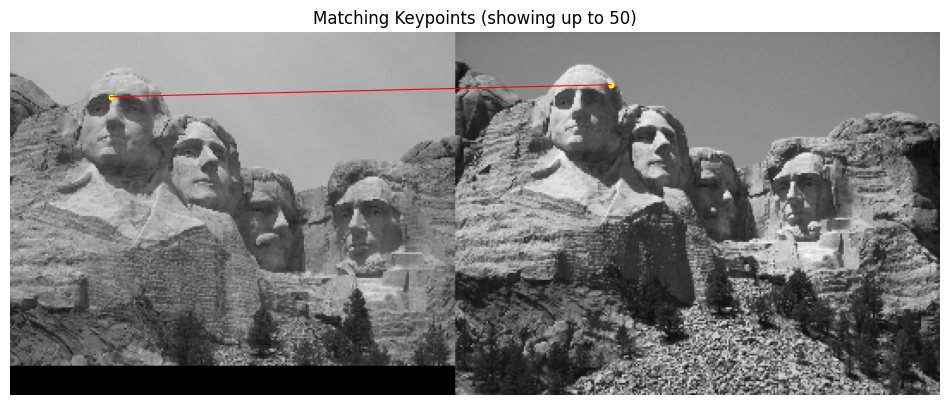

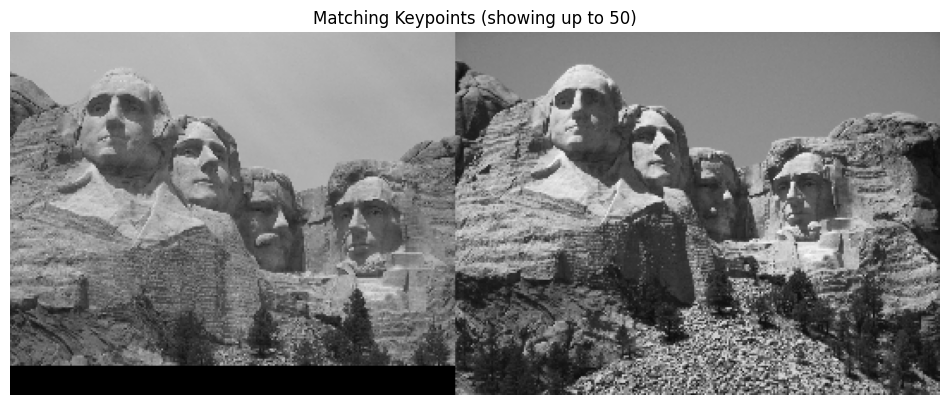

In [93]:
draw_matches(img1, img2, keypoints1, keypoints2, nn_matches)
draw_matches(img1, img2, keypoints1, keypoints2, ratio_matches)

In [94]:
def compute_homography(src_pts, dst_pts):
    """
    최소 4개 이상의 점쌍으로부터 H 추정 (DLT 방식)
    src_pts, dst_pts: (N, 2) numpy arrays
    """
    N = src_pts.shape[0]
    A = []

    for i in range(N):
        x, y = src_pts[i]
        x_, y_ = dst_pts[i]

        A.append([-x, -y, -1,  0,  0,  0, x * x_, y * x_, x_])
        A.append([ 0,  0,  0, -x, -y, -1, x * y_, y * y_, y_])

    A = np.array(A)
    _, _, V = np.linalg.svd(A)
    H = V[-1].reshape(3, 3) # SVD 후 가장 작은 eigenvalue에 해당하는 eigenvector를 solution으로 사용
    return H / H[2, 2]  # 정규화


In [95]:
def ransac_homography(src_pts, dst_pts, num_iter=10000, thresh=3):
    """
    RANSAC으로 H 추정 및 inlier 추출
    """
    best_H = None
    best_inliers = []

    N = len(src_pts)

    if N < 4:
      return None, []
    for _ in range(num_iter):
        idx = np.random.choice(N, 4, replace=False)
        H = compute_homography(src_pts[idx], dst_pts[idx])

        # 변환 후 거리 계산
        src_h = np.hstack([src_pts, np.ones((N, 1))])
        projected = (H @ src_h.T).T
        projected /= projected[:, 2][:, None]
        dst_projected = projected[:, :2]

        dists = np.linalg.norm(dst_pts - dst_projected, axis=1)
        inliers = np.where(dists < thresh)[0]

        if len(inliers) > len(best_inliers):
            best_inliers = inliers
            best_H = H

    return best_H, best_inliers


In [96]:
# 매칭 결과에서 좌표 추출
src_pts = np.array([keypoints1[i] for i, _ in ratio_matches])
dst_pts = np.array([keypoints2[j] for _, j in ratio_matches])

# RANSAC 수행
H, inliers = ransac_homography(src_pts, dst_pts)

# Inlier 개수 출력
print("Inliers:", len(inliers), "/", len(ratio_matches))


Inliers: 0 / 0


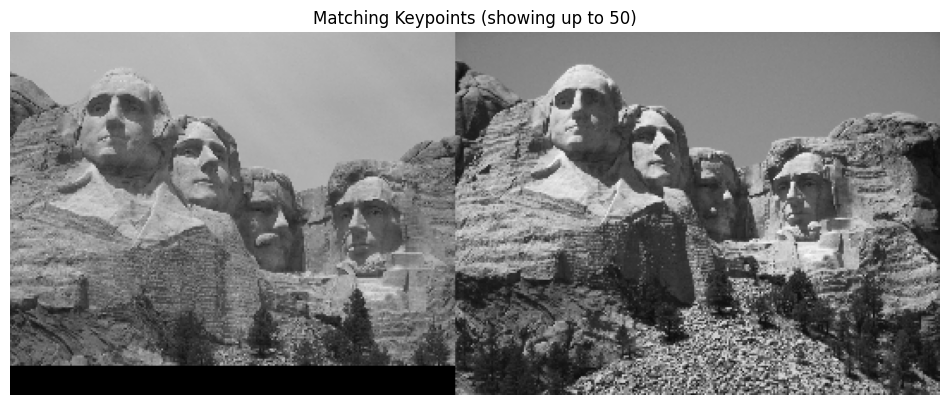

In [97]:
# inlier 그려보기

inlier_matches = [ratio_matches[i] for i in inliers]
draw_matches(img1.astype(np.uint8), img2.astype(np.uint8), keypoints1, keypoints2, inlier_matches)

In [98]:
def warp_image(img_src, H, output_shape, offset=(0, 0)):
    """
    Homography H를 적용하여 img_src를 새로운 시점으로 warp
    """
    h, w = output_shape
    offset_x, offset_y = offset
    translation = np.array([[1, 0, offset_x],
                            [0, 1, offset_y],
                            [0, 0, 1]])
    H_offset = translation @ H
    warped = cv2.warpPerspective(img_src, H_offset, (w, h))
    return warped


def stitch_images(img1, img2, H):
    """
    이미지 2장을 하나의 파노라마로 스티칭
    img2: 기준 이미지 (reference)
    img1: 변환 이미지 (warp 대상)
    H: img1 → img2로 변환되는 Homography
    """
    h1, w1 = img1.shape[:2]
    h2, w2 = img2.shape[:2]

    # img1의 코너들을 img2 좌표계로 변환
    corners_img1 = np.array([[0, 0], [0, h1], [w1, h1], [w1, 0]], dtype=np.float32)
    corners_img1 = np.hstack([corners_img1, np.ones((4, 1))])
    transformed_corners = (H @ corners_img1.T).T
    transformed_corners /= transformed_corners[:, 2][:, None]
    corners = transformed_corners[:, :2]

    # 전체 캔버스 크기 계산
    all_x = np.hstack([corners[:, 0], [0, w2]])
    all_y = np.hstack([corners[:, 1], [0, h2]])
    min_x, max_x = int(np.floor(all_x.min())), int(np.ceil(all_x.max()))
    min_y, max_y = int(np.floor(all_y.min())), int(np.ceil(all_y.max()))

    output_w = max_x - min_x
    output_h = max_y - min_y
    offset = (-min_x, -min_y)

    # img1을 warp해서 img2 좌표계에 맞추기
    warped_img1 = warp_image(img1, H, (output_h, output_w), offset)

    # img2를 정위치에 넣기
    stitched = np.zeros_like(warped_img1)
    stitched[offset[1]:offset[1]+h2, offset[0]:offset[0]+w2] = img2

    # blending
    mask = (warped_img1 > 0) & (stitched > 0)
    stitched[mask] = (stitched[mask] / 2 + warped_img1[mask] / 2).astype(np.uint8)
    stitched[~mask] += warped_img1[~mask]

    return stitched

# img1 → img2 방향 H로 img1을 warp
stitched = stitch_images(img1.astype(np.uint8), img2.astype(np.uint8), H)

plt.figure(figsize=(12, 8))
plt.imshow(stitched, cmap='gray')
plt.title("Stitched Panorama (img1 warped to img2)")
plt.axis('off')
plt.show()


ValueError: matmul: Input operand 0 does not have enough dimensions (has 0, gufunc core with signature (n?,k),(k,m?)->(n?,m?) requires 1)

In [ ]:
# Q1+.
